Do `Kernel -> Restart & Run All` in top menu to run the notebook

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz, resample, convolve
import soundfile as sf
import IPython

## Speech + noise

In [3]:
# read the speech
data, fs = sf.read('data/050a0508_1.4465_22gc0102_-1.4465.wav')
# create white noise
noise_all = np.random.randn(data.shape[0])
# filter the noise to have it around 800 Hz
b, a = butter(5, [0.2, 0.25], 'bandpass')
noise_narrow  = lfilter(b, a, noise_all)
# add noise to the speech
data_noise = data + noise_narrow

In [4]:
# create bandstop filter to filter out frequencies corrupted by the noise
b, a = butter(5, [0.15, 0.3], 'bandstop')
data_filt = lfilter(b, a, data_noise)

In [5]:
print('Clean speech')
IPython.display.display(IPython.display.Audio(data, rate=fs))
print('Corrupted speech')
IPython.display.display(IPython.display.Audio(data_noise, rate=fs))
print('Filtered speech')
IPython.display.display(IPython.display.Audio(data_filt, rate=fs))

Clean speech


Corrupted speech


Filtered speech


In [6]:
# Compute the spectra
spec = np.fft.fft(data)
spec_noise = np.fft.fft(data_noise)
spec_filt = np.fft.fft(data_filt)

<IPython.core.display.Javascript object>


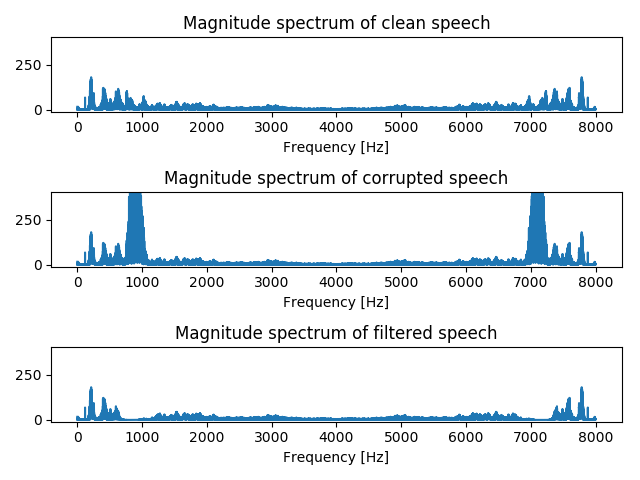

In [7]:
# Plot the magnitude spectra
f = np.linspace(0,8000,spec_filt.shape[0])
fig, ax = plt.subplots(3,1)
for a in ax:
    a.set_ylim([-10, 400])
ax[0].plot(f,np.abs(spec))
ax[0].set_title('Magnitude spectrum of clean speech')
ax[0].set_xlabel('Frequency [Hz]')
ax[1].plot(f,np.abs(spec_noise))
ax[1].set_title('Magnitude spectrum of corrupted speech')
ax[1].set_xlabel('Frequency [Hz]')
ax[2].plot(f,np.abs(spec_filt))
ax[2].set_title('Magnitude spectrum of filtered speech')
ax[2].set_xlabel('Frequency [Hz]')
fig.tight_layout()
plt.show()

## EKG signal

Source and some more info https://data.mendeley.com/datasets/7dybx7wyfn/3

In [8]:
from scipy.io import loadmat

In [9]:
# load the data
data = loadmat('data/100m.mat')
sig = data['val'][0,:]

<IPython.core.display.Javascript object>


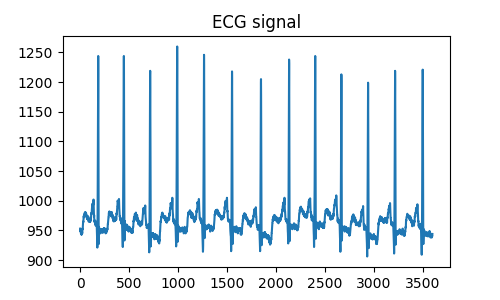

In [10]:
plt.figure(figsize=(5,3))
plt.plot(sig)
plt.gca().set_title('ECG signal')
plt.show()

<IPython.core.display.Javascript object>


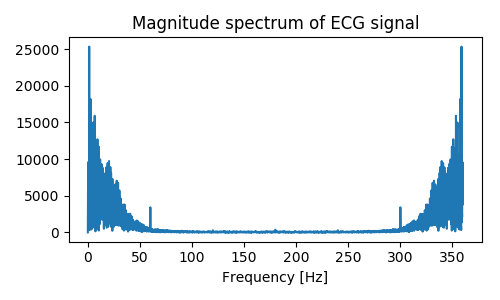

In [11]:
# compute the spectrum of the centered signal
spec = np.fft.fft(sig - np.mean(sig))
# plot the spectrum
fig = plt.figure(figsize=(5,3))
plt.plot(np.linspace(0,360,spec.shape[0]), np.abs(spec))
plt.gca().set_xlabel('Frequency [Hz]')
plt.gca().set_title('Magnitude spectrum of ECG signal')
fig.tight_layout()
plt.show()